In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

1. (20) Задача Дирихле для уравнения Пуассона. Решите задачу Дирихле для уравнения Пуассона



$$
\begin{array}{ll}
\Delta u=4, & x_i \in[0,1], i=1,2 \\
\left.u\right|_{x_1=0}=x_2^2, & \left.u\right|_{x_1=1}=1+x_2^2 \\
\left.u\right|_{x_2=0}=x_1^2, & \left.u\right|_{x_2=1}=1+x_1^2
\end{array}
$$



методом Зейделя. Для справки: точное решение имеет вид $u\left(x_1, x_2\right)=x_1^2+x_2^2$.

In [3]:
n = 100

Делаем индексацию одномерной: s = i*(n+1) + j

In [4]:
def s(i, j, n):
    return i*(n+1) + j

In [5]:
h_1, h_2 = 1/n, 1/n
igrek = np.zeros((n+1)*(n+1))
igrek_cur = np.zeros((n+1)*(n+1))
err = np.zeros((n+1)*(n+1))
err_gt = np.zeros((n+1)*(n+1))
counter = 0

gt = np.zeros((n+1)*(n+1))
for i in range(0, n+1):
    for j in range(0, n+1):
        gt[s(i, j, n)] = (i*h_1)**2+(j*h_2)**2
        
for k in range(n+1):
    igrek[s(0, k, n)] = (k * h_2) ** 2
    igrek[s(n, k, n)] = 1 + (k * h_2) ** 2
    igrek[s(k, 0, n)] = (k * h_1) ** 2
    igrek[s(k, n, n)] = 1 + (k * h_2) ** 2

c = 2*(1/h_1**2 + 1/h_2**2)
while True:
    counter += 1
    for i in range(1, n):
        for j in range(1, n):
            igrek[s(i, j, n)] = (igrek[s(i+1, j, n)] + igrek[s(i-1, j, n)]) * (1/h_1**2) +\
                             (igrek[s(i, j+1, n)] + igrek[s(i, j-1, n)]) * (1/h_2**2) - 4
            igrek[s(i, j, n)] /= c
    if np.linalg.norm(igrek_cur - igrek, ord=2) < 0.003:
        err = np.abs((igrek_cur - igrek) / igrek)
        for i in range(0, n+1):
            for j in range(0, n+1):
                err_gt[s(i, j, n)] = np.abs((gt[s(i, j, n)] - igrek[s(i, j, n)]) / gt[s(i, j, n)])

        print(np.linalg.norm(igrek_cur - igrek), "a_eps")
        print(np.linalg.norm(igrek), "norm")
        break
    igrek_cur = np.copy(igrek)

0.0029987862020138464 a_eps
78.41153776243216 norm


<ipython-input-5-6a8ef545f492>:28: RuntimeWarning: invalid value encountered in true_divide
  err = np.abs((igrek_cur - igrek) / igrek)
<ipython-input-5-6a8ef545f492>:31: RuntimeWarning: invalid value encountered in double_scalars
  err_gt[s(i, j, n)] = np.abs((gt[s(i, j, n)] - igrek[s(i, j, n)]) / gt[s(i, j, n)])


In [6]:
counter

2825

решение

<AxesSubplot:>

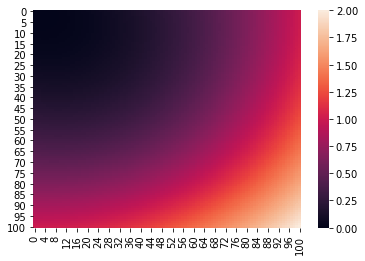

In [7]:
data = np.reshape(igrek, (n+1, n+1))
sns.heatmap(data)
# sns.heatmap(data, cmap='crest')

вручную отразим ось у

In [8]:
def reflector(ar):
    ar_r = np.zeros((n+1, n+1))
    for i in range(0, n+1):
        for j in range(0, n+1):
            ar_r[-i][j] = ar[s(i, j, n)]
    return ar_r

<AxesSubplot:>

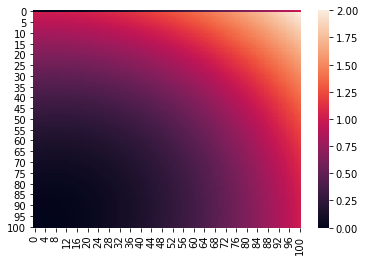

In [9]:
sns.heatmap(reflector(igrek))

сейчас и дальше по оси у там, где было 100 д.б. 0 и наоборот

относительная ошибка (относительно пред. шага)

<AxesSubplot:>

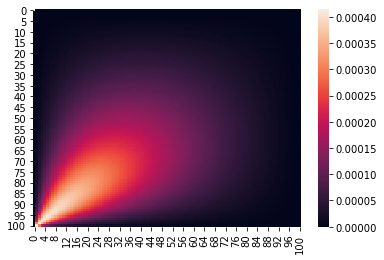

In [10]:
sns.heatmap(reflector(err))

<AxesSubplot:>

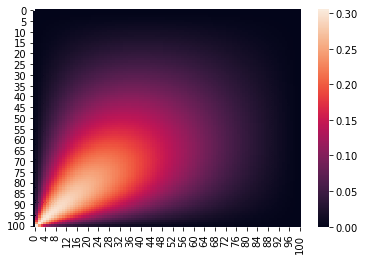

In [11]:
sns.heatmap(reflector(err_gt))

In [12]:
def dif_n_iter(counter_bound):
    h_1, h_2 = 1/n, 1/n
    igrek = np.zeros((n+1)*(n+1))
    igrek_cur = np.zeros((n+1)*(n+1))
    err = np.zeros((n+1)*(n+1))
    err_gt = np.zeros((n+1)*(n+1))
    counter = 0

    for k in range(n+1):
        igrek[s(0, k, n)] = (k * h_2) ** 2
        igrek[s(n, k, n)] = 1 + (k * h_2) ** 2
        igrek[s(k, 0, n)] = (k * h_1) ** 2
        igrek[s(k, n, n)] = 1 + (k * h_2) ** 2

    c = 2*(1/h_1**2 + 1/h_2**2)
    while counter < counter_bound:
        counter += 1
        for i in range(1, n):
            for j in range(1, n):
                igrek[s(i, j, n)] = (igrek[s(i+1, j, n)] + igrek[s(i-1, j, n)]) * (1/h_1**2) +\
                                 (igrek[s(i, j+1, n)] + igrek[s(i, j-1, n)]) * (1/h_2**2) - 4
                igrek[s(i, j, n)] /= c
        if np.linalg.norm(igrek_cur - igrek, ord=2) < 0.003:
            err_gt = np.abs((gt - igrek) / gt)
            err = np.abs((igrek_cur - igrek) / igrek)
            print(np.linalg.norm(igrek_cur - igrek), "a_eps")
            print(np.linalg.norm(igrek), "norm")
            break
        err_gt = np.abs((gt - igrek) / gt)
        err = np.abs((igrek_cur - igrek) / igrek)
        igrek_cur = np.copy(igrek)
    
    
    return igrek, err, err_gt

In [13]:
igrek1, err1, err_gt1 = dif_n_iter(1000)

<ipython-input-12-d984cb1cbdca>:29: RuntimeWarning: invalid value encountered in true_divide
  err_gt = np.abs((gt - igrek) / gt)
<ipython-input-12-d984cb1cbdca>:30: RuntimeWarning: invalid value encountered in true_divide
  err = np.abs((igrek_cur - igrek) / igrek)


In [14]:
igrek2, err2, err_gt2 = dif_n_iter(2000)

<ipython-input-12-d984cb1cbdca>:29: RuntimeWarning: invalid value encountered in true_divide
  err_gt = np.abs((gt - igrek) / gt)
<ipython-input-12-d984cb1cbdca>:30: RuntimeWarning: invalid value encountered in true_divide
  err = np.abs((igrek_cur - igrek) / igrek)


численное решение

<AxesSubplot:>

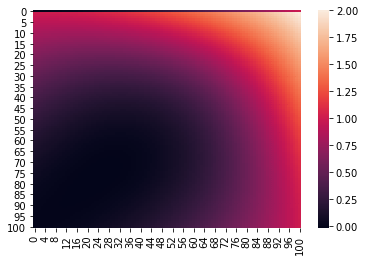

In [16]:
sns.heatmap(reflector(igrek1))

<AxesSubplot:>

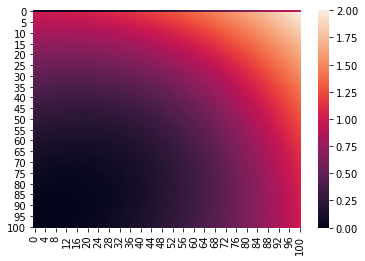

In [17]:
sns.heatmap(reflector(igrek2))

<AxesSubplot:>

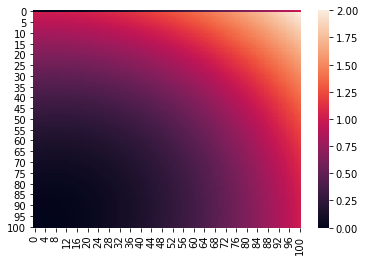

In [18]:
sns.heatmap(reflector(igrek))

ошибки относительно пред. шага

<AxesSubplot:>

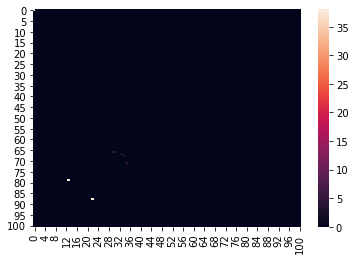

In [19]:
sns.heatmap(reflector(err1))

<AxesSubplot:>

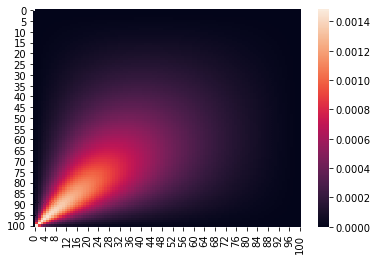

In [20]:
sns.heatmap(reflector(err2))

<AxesSubplot:>

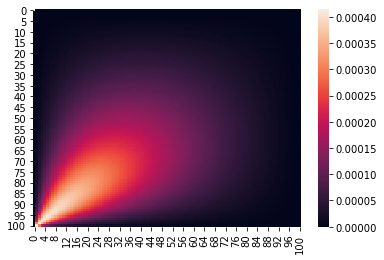

In [21]:
sns.heatmap(reflector(err))

относительная погрешность

<AxesSubplot:>

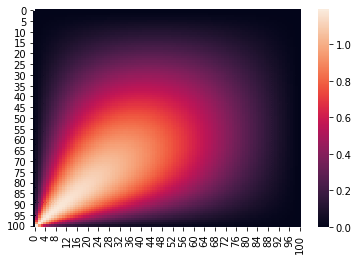

In [22]:
sns.heatmap(reflector(err_gt1))

<AxesSubplot:>

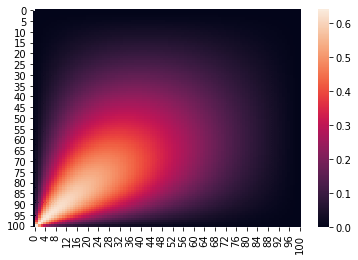

In [23]:
sns.heatmap(reflector(err_gt2))

<AxesSubplot:>

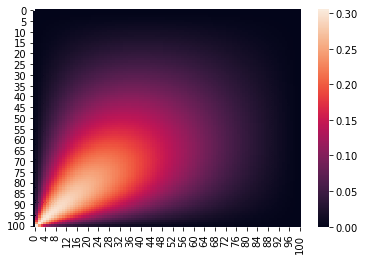

In [24]:
sns.heatmap(reflector(err_gt))